In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

%matplotlib inline

In [2]:
titanic = pd.read_csv("/Users/rahulkumania/Desktop/Data_Science_EssT_Pt2/Exercise Files/Data/titanic-training-data.csv")

In [3]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# CHECKING THE ASSUMPTIONS FOR LOGISTIC REGRESSION

## Checking our target variable It is binary or not ?

<AxesSubplot:xlabel='Survived', ylabel='count'>

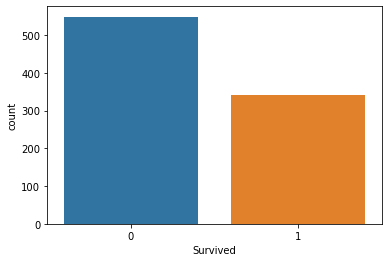

In [5]:
sb.countplot(x='Survived', data= titanic)

## Checking Missing Value

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dropping the variables that would not help in prediction

In [7]:
titanic_data = titanic.drop(['Name', 'Ticket', 'Cabin'], axis =1)

In [8]:
titanic_data.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S
8,9,1,3,female,27.0,0,2,11.1333,S
9,10,1,2,female,14.0,1,0,30.0708,C


### Imputting missing value

In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='Age'>

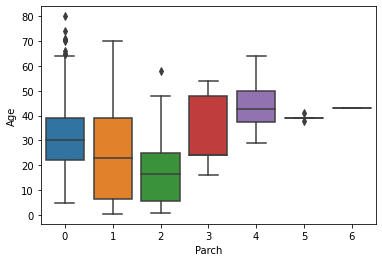

In [10]:
sb.boxplot(x='Parch', y='Age' , data = titanic_data)

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

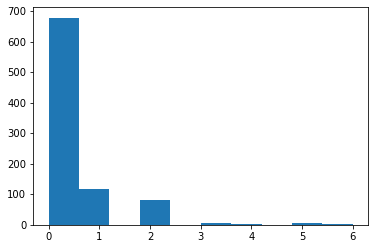

In [11]:
plt.hist(titanic_data['Parch'])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

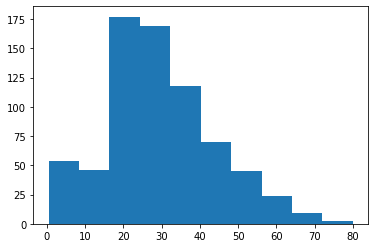

In [12]:
plt.hist(titanic_data['Age'])

In [13]:
Parch_groups = titanic_data.groupby(titanic_data['Parch'])

In [14]:
Parch_groups.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Fare
Parch,,,,,,
0,445.255162,0.343658,2.321534,32.178503,0.237463,25.586774
1,465.110169,0.550847,2.203390,24.422000,1.084746,46.778180
2,416.662500,0.500000,2.275000,17.216912,2.062500,64.337604
3,579.200000,0.600000,2.600000,33.200000,1.000000,25.951660
4,384.000000,0.000000,2.500000,44.500000,0.750000,84.968750
5,435.200000,0.200000,3.000000,39.200000,0.600000,32.550000
6,679.000000,0.000000,3.000000,43.000000,1.000000,46.900000


In [15]:
def age_approx(cols):
    Age = cols[0]
    Parch =cols[1]
    
    if pd.isnull(Age):
        if Parch==0:
            return 32
        elif Parch == 1:
            return 24
        elif  Parch == 2:
            return 17
        elif Parch ==3:
            return 33
        elif Parch == 4:
            return 45
        else:
            return 30
        
    else:
        return Age

In [16]:
titanic_data['Age']= titanic_data[['Age', 'Parch']].apply(age_approx, axis =1)

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [18]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [19]:
titanic_data.dropna(inplace=True)
titanic_data.reset_index(inplace = True, drop=True)

In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Variables to a dummy Indicators
### We need to format sex and embark variable

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
gender_cat = titanic_data['Sex']
gender_encoded = label_encoder.fit_transform(gender_cat)

In [22]:
## 1 --> Male
## 0 --> Female
gender_encoded

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,

In [23]:
gender_df = pd.DataFrame(data = gender_encoded, columns = ['Sex_code'])

In [24]:
gender_df

,Sex_code
0,1
1,0
2,0
3,0
4,1
...,...
884,1
885,0
886,0
887,1


In [25]:
embarked_cat = titanic_data['Embarked']
embarked_encoded = label_encoder.fit_transform(embarked_cat)

In [26]:
## 0 --> C
## 1 --> Q
## 2 --> S
embarked_encoded

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 1,

#### We need to one hot encode emabark so we can have binary values 

In [27]:
from sklearn.preprocessing import OneHotEncoder
binary_encoder = OneHotEncoder(categories='auto')
embarked_1hot = binary_encoder.fit_transform(embarked_encoded.reshape(-1,1))
embarked_1hot_mat = embarked_1hot.toarray()
embarked_df = pd.DataFrame(data = embarked_1hot_mat, columns = ['C', 'Q', 'S'])

In [28]:
embarked_df

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [29]:
titanic_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [30]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
884,887,0,2,27.0,0,0,13.0000
885,888,1,1,19.0,0,0,30.0000
886,889,0,3,17.0,1,2,23.4500
887,890,1,1,26.0,0,0,30.0000


In [31]:
titanic_df = pd.concat([titanic_data, gender_df, embarked_df], axis =1, 
                      verify_integrity=True).astype(float)

In [32]:
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_code,C,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,887.0,0.0,2.0,27.0,0.0,0.0,13.0000,1.0,0.0,0.0,1.0
885,888.0,1.0,1.0,19.0,0.0,0.0,30.0000,0.0,0.0,0.0,1.0
886,889.0,0.0,3.0,17.0,1.0,2.0,23.4500,0.0,0.0,0.0,1.0
887,890.0,1.0,1.0,26.0,0.0,0.0,30.0000,1.0,1.0,0.0,0.0


## Checking for independence between features

In [33]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_code,C,Q,S
PassengerId,1.000000,-0.005028,-0.035330,0.026945,-0.057686,-0.001657,0.012703,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.072126,-0.034040,0.083151,0.255290,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.328299,0.081656,0.016824,-0.548193,0.127741,-0.245733,0.220558,0.076466
Age,0.026945,-0.072126,-0.328299,1.000000,-0.295432,-0.220454,0.076341,0.103011,0.034083,0.012844,-0.037949
SibSp,-0.057686,-0.034040,0.081656,-0.295432,1.000000,0.414542,0.160887,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.220454,0.414542,1.000000,0.217532,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.076341,0.160887,0.217532,1.000000,-0.179958,0.270731,-0.116684,-0.163758
Sex_code,0.043136,-0.541585,0.127741,0.103011,-0.116348,-0.247508,-0.179958,1.000000,-0.084520,-0.075217,0.121405
C,-0.001208,0.169966,-0.245733,0.034083,-0.060074,-0.011588,0.270731,-0.084520,1.000000,-0.148646,-0.782613
Q,-0.033694,0.004536,0.220558,0.012844,-0.026692,-0.081585,-0.116684,-0.075217,-0.148646,1.000000,-0.499261


<AxesSubplot:>

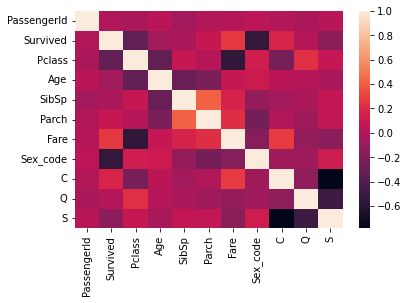

In [34]:
sb.heatmap(titanic_df.corr())

In [35]:
titanic_df.drop(['Pclass', 'Fare'], inplace=True, axis=1)

In [36]:
titanic_df

,PassengerId,Survived,Age,SibSp,Parch,Sex_code,C,Q,S
0,1.0,0.0,22.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,38.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5.0,0.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
884,887.0,0.0,27.0,0.0,0.0,1.0,0.0,0.0,1.0
885,888.0,1.0,19.0,0.0,0.0,0.0,0.0,0.0,1.0
886,889.0,0.0,17.0,1.0,2.0,0.0,0.0,0.0,1.0
887,890.0,1.0,26.0,0.0,0.0,1.0,1.0,0.0,0.0


#### We have 6 predictive feature in this dataset for Survived

## Splitting into train and test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(titanic_df.drop("Survived",
                                                    axis=1), titanic_df['Survived'],
                                                     test_size =0.2, random_state=200)

In [38]:
print(X_train.shape)
print(y_train.shape)

(711, 8)
(711,)


## Deploying and Evaluating model

In [41]:
LogReg = LogisticRegression(solver = "liblinear")
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [42]:
y_pred = LogReg.predict(X_test)

In [43]:
y_pred 

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0.])

In [45]:
y_test

45     0.0
873    1.0
435    0.0
129    0.0
713    0.0
      ... 
179    0.0
337    1.0
57     0.0
618    0.0
548    1.0
Name: Survived, Length: 178, dtype: float64

## Model Evaluation
### Classification report without cross-validation

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.



In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       109
         1.0       0.79      0.71      0.75        69

    accuracy                           0.81       178
   macro avg       0.81      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### K-Fold cross - validation and confusion matrices

#### Confusion matrix 

In [67]:
y_train.shape

(711,)

In [65]:
X_train.shape

(711, 8)

In [62]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[377,  63],
       [ 91, 180]])

In [61]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=10)
confusion_matrix(y_train, y_train_pred)

array([[378,  62],
       [ 91, 180]])

In [48]:
precision_score(y_train, y_train_pred)

0.7407407407407407

## Make a test prediction

In [49]:
titanic_df[863:864]

,PassengerId,Survived,Age,SibSp,Parch,Sex_code,C,Q,S
863,866.0,1.0,42.0,0.0,0.0,0.0,0.0,0.0,1.0


In [50]:
test_passenger = np.array([866, 40, 0, 0, 0, 0, 0, 1]).reshape(1,-1)

print(LogReg.predict(test_passenger))
print(LogReg.predict_proba(test_passenger))

[1.]
[[0.26351831 0.73648169]]


/Users/rahulkumania/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/rahulkumania/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
